In [1]:
%matplotlib inline

import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

In [2]:
import pickle

with open ('/home/aris/Desktop/image_survey_metrics.pickle', 'rb') as f:
    image_survey_metrics = pickle.load(f)
    
print 'The last year dataframe has '+ str(len(image_survey_metrics['user_id'].unique()))+' users.'
print image_survey_metrics.shape


The last year dataframe has 107 users.
(513714, 75)


In [3]:
hist_perma = image_survey_metrics[['user_id','PERMA']]
hist_perma.head()



,user_id,PERMA
0,53918317.0,5.0
1,53918317.0,5.0
2,53918317.0,5.0
3,53918317.0,5.0
4,53918317.0,5.0


In [5]:
Perma_user = hist_perma.groupby('user_id').max()
print Perma_user.shape
Perma_user.head()

(107, 1)


,PERMA
user_id,
1619510.0,4.181818
2829661.0,7.454545
3069744.0,5.454545
3988856.0,7.818182
6734387.0,6.181818


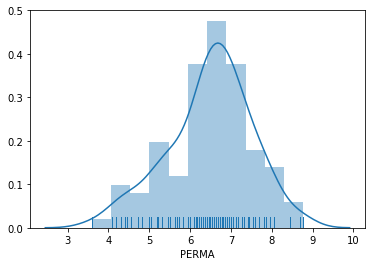

In [8]:
sns.distplot(Perma_user.PERMA, rug=True)smf

In [11]:
Perma_user.PERMA.describe()

count    107.000000
mean       6.482583
std        1.032409
min        3.590909
25%        5.954545
50%        6.590909
75%        7.181818
max        8.772727
Name: PERMA, dtype: float64

In [3]:
#image_survey_metrics.end_q.sort_values()

In [4]:
#'start_q','end_q'
image_survey_metrics.columns

Index([u'image_id', u'image_height', u'image_width', u'image_filter',
       u'image_posted_time', u'data_memorability', u'user_id',
       u'user_followed_by', u'user_follows', u'user_posted_photos',
       u'anp_label', u'anp_sentiment', u'emotion_score', u'emotion_label',
       u'data_amz_label', u'data_amz_label_confidence', u'face_id',
       u'face_gender', u'face_gender_confidence', u'face_age_range_high',
       u'face_age_range_low', u'face_sunglasses', u'face_beard',
       u'face_beard_confidence', u'face_mustache', u'face_mustache_confidence',
       u'face_smile', u'face_smile_confidence', u'eyeglasses',
       u'eyeglasses_confidence', u'face_emo', u'emo_confidence', u'id',
       u'gender', u'born', u'education', u'employed', u'income', u'A_2',
       u'N_1', u'P_1', u'E_1', u'A_1', u'H_1', u'M_1', u'R_1', u'M_2', u'E_2',
       u'LON', u'H_2', u'P_2', u'N_2', u'A_3', u'N_3', u'E_3', u'H_3', u'R_2',
       u'M_3', u'R_3', u'P_3', u'HAP', u'insta_user_id', u'start_q', u'

In [5]:
image_survey_metrics['image_posted_time'].head()

0   2016-10-31 01:54:50
1   2016-10-31 01:54:50
2   2016-10-31 01:54:50
3   2016-10-31 01:54:50
4   2016-10-31 01:54:50
Name: image_posted_time, dtype: datetime64[ns]

In [6]:
image_survey_metrics.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
0,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,5.0,8.0,1,105.0,0.0,3.0
1,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,5.0,8.0,1,105.0,0.0,3.0
2,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,5.0,8.0,1,105.0,0.0,3.0
3,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,5.0,8.0,1,105.0,0.0,3.0
4,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,5.0,8.0,1,105.0,0.0,3.0


In [7]:
image_survey_metrics.drop_duplicates(inplace=True)
print 'The last year dataframe has '+ str(len(image_survey_metrics['user_id'].unique()))+' users.'
print image_survey_metrics.shape

The last year dataframe has 107 users.
(459570, 75)


In [8]:
imgid_uid = image_survey_metrics[['user_id','image_id']].drop_duplicates() #set a matrix
get_uid_from_imgid = imgid_uid.set_index('image_id').to_dict()['user_id'] # img_id -> uid
get_imgids_from_uid = {k: list(v) for k,v in imgid_uid.groupby('user_id')["image_id"]}


In [9]:
image_df = feather.read_dataframe('data_science_case/image_data.feather')
#Drop unnecessary columns in image_df dataframework
image_df.head()
drop = ['image_link','image_url','image_posted_time_unix','user_full_name',\
        'user_name','user_website','user_profile_pic','user_bio']

image_df =  image_df.drop(drop,axis=1)
#image_df.head()
image_df.columns

Index([u'image_id', u'image_height', u'image_width', u'image_filter',
       u'image_posted_time', u'data_memorability', u'user_id',
       u'user_followed_by', u'user_follows', u'user_posted_photos'],
      dtype='object')

In [10]:
#load ANPs from Aris pickle df
a=list(image_df.columns)
#TOTAL PERMA SCORE
a.append('PERMA')
a.append('start_q')
a.append('end_q')

#TOTAL POSITIVE SCORE
#a.append('P_EMO')

#TOTAL NEGATIVE SCORE
#a.append('N_EMO')

#IMAGE FEATURES

image_df = image_survey_metrics[a].drop_duplicates().set_index("image_id")
del image_df.index.name

In [11]:
print image_df.shape
image_df.head()

(2776, 12)


,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,PERMA,start_q,end_q
1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,5.0,2016-12-05 14:05:13,2016-12-05 14:06:38
1376341630843643565_53918317,640.0,640.0,Normal,2016-11-04 20:52:09,0.831631,53918317.0,100.0,174.0,105.0,5.0,2016-12-05 14:05:13,2016-12-05 14:06:38
1373407612938533591_53918317,640.0,640.0,Moon,2016-10-31 19:42:47,0.907868,53918317.0,100.0,174.0,105.0,5.0,2016-12-05 14:05:13,2016-12-05 14:06:38
1372871586851626025_53918317,640.0,640.0,Mayfair,2016-10-31 01:57:48,0.853218,53918317.0,100.0,174.0,105.0,5.0,2016-12-05 14:05:13,2016-12-05 14:06:38
1376342482815974929_53918317,640.0,640.0,Normal,2016-11-04 20:53:51,0.801783,53918317.0,100.0,174.0,105.0,5.0,2016-12-05 14:05:13,2016-12-05 14:06:38


In [12]:
test = image_df.groupby('user_id').mean()
test.shape

(107, 7)

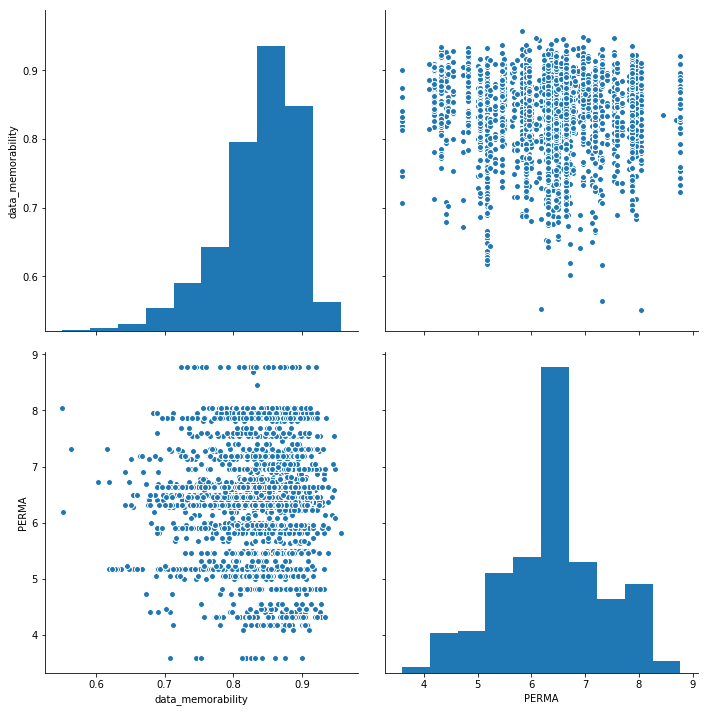

In [13]:
import seaborn as sns

g = sns.pairplot(image_df, size=5,vars=["data_memorability","PERMA"])

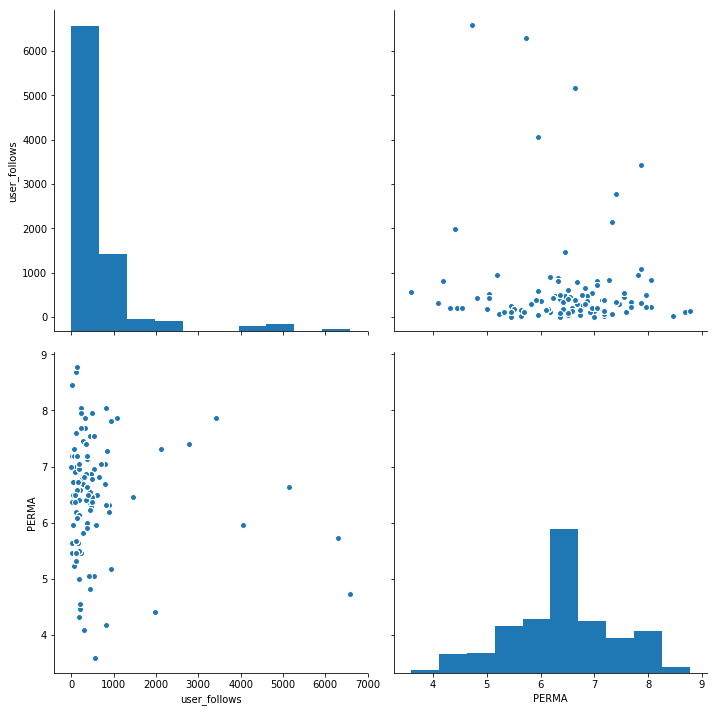

In [14]:
g = sns.pairplot(image_df, size=5,vars=["user_follows","PERMA"])

In [15]:
image_df[image_df.user_follows>1000]['user_id'].unique()

array([  6.19868570e+08,   2.54694430e+07,   2.27027527e+09,
         2.09227639e+09,   3.80758991e+09,   2.49861555e+08,
         2.03264207e+09,   4.23918871e+09,   3.08378280e+07,
         1.97668213e+09])

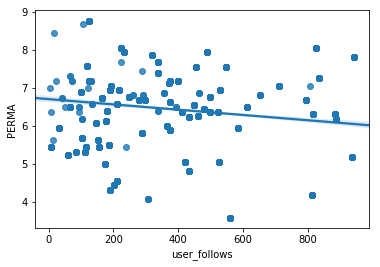

In [16]:
#,fit_reg=False
sns.regplot('user_follows','PERMA',data=image_df[image_df.user_follows<1000])

In [17]:
a = image_df[image_df.user_follows<1000]
print len(image_df.user_id.unique())
print len(a.user_id.unique())

107
97


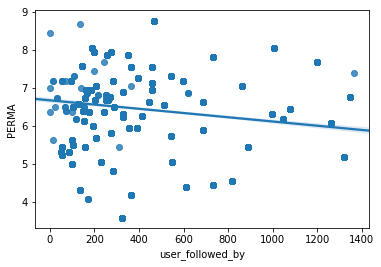

In [18]:
#g = sns.pairplot(image_df, size=5,vars=["user_followed_by","PERMA"])
#,fit_reg=False
sns.regplot('user_followed_by','PERMA',data=image_df[image_df.user_followed_by<1500])
#.regplot('user_followed_by','PERMA',data=image_df[image_df.user_follows<1000])

In [19]:
a = image_df[image_df.user_followed_by<1500]
print len(image_df.user_id.unique())
print len(a.user_id.unique())

107
101


In [20]:
outliers = list(image_df[image_df.user_followed_by>1500]['user_id'].unique())
print outliers

[3807589911.0, 2062266819.0, 2032642067.0, 275510681.0, 30837828.0, 1976682131.0]


In [21]:
image_df[image_df.user_followed_by>1500]['user_id'].unique()

array([  3.80758991e+09,   2.06226682e+09,   2.03264207e+09,
         2.75510681e+08,   3.08378280e+07,   1.97668213e+09])

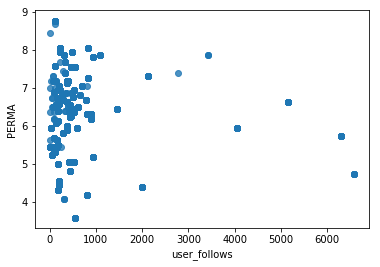

In [22]:
sns.regplot('user_follows','PERMA',data=image_df,fit_reg=False,)

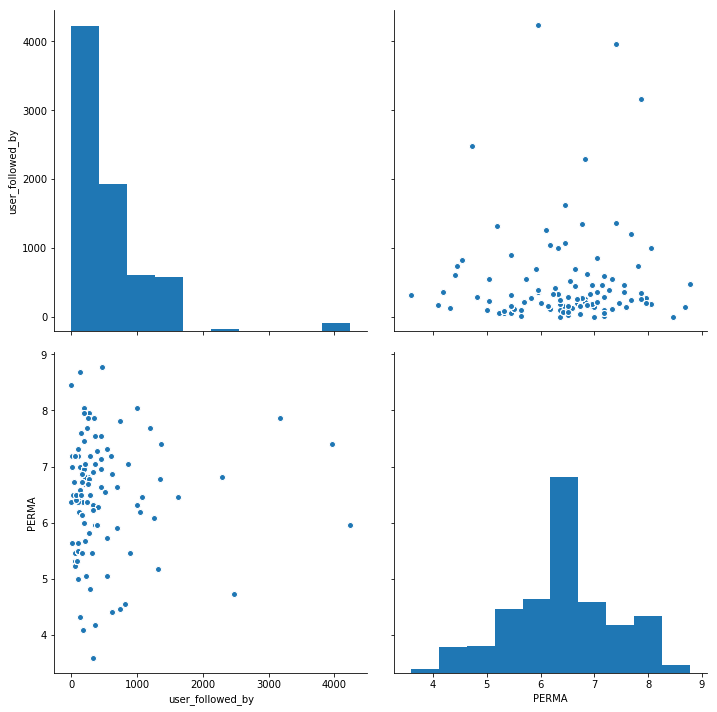

In [23]:
g = sns.pairplot(image_df, size=5,vars=["user_followed_by","PERMA"])

# Correlation heatmap

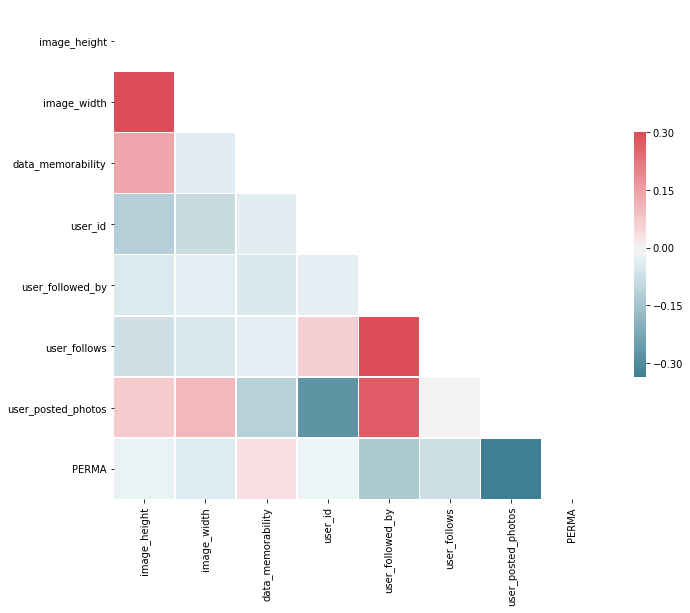

In [24]:
#correlation matrix
correlation_matrix = image_df.corr()

#PLOT THE CORRELATIONS TO Seaborn

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure|
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Analysis

In [25]:
#generate a new df containing the classes corresponding to Butchniks emotions
classes = image_df.image_filter.unique()
from sklearn.preprocessing import label_binarize
image_final = pd.DataFrame(label_binarize(image_df.image_filter, classes=classes),columns=classes,index=image_df.index)

image_final.head()



,Normal,Moon,Mayfair,Lark,Sierra,Rise,Valencia,Nashville,Amaro,Perpetua,...,Brooklyn,Hudson,Inkwell,Ginza,Walden,Earlybird,Sutro,Brannan,Helena,Charmes
1372870097060159201_53918317,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1376341630843643565_53918317,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1373407612938533591_53918317,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372871586851626025_53918317,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1376342482815974929_53918317,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Metrics

In [26]:
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')

In [27]:
metrics_df.columns

Index([u'image_id', u'comment_count', u'comment_count_time_created',
       u'like_count', u'like_count_time_created'],
      dtype='object')

In [28]:


#Drop unnecessary columns in metrics_df dataframework
metrics_df.head()
drop = ['comment_count_time_created','like_count_time_created']
metrics_df =  metrics_df.drop(drop,axis=1)
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [29]:
imgid_uid = image_survey_metrics[['user_id','image_id']].drop_duplicates() #set a matrix
get_uid_from_imgid = imgid_uid.set_index('image_id').to_dict()['user_id'] # img_id -> uid
get_imgids_from_uid = {k: list(v) for k,v in imgid_uid.groupby('user_id')["image_id"]}

image_df = feather.read_dataframe('data_science_case/image_data.feather')
#Drop unnecessary columns in image_df dataframework
image_df.head()
drop = ['image_link','image_url','image_posted_time_unix','user_full_name',\
        'user_name','user_website','user_profile_pic','user_bio']

image_df =  image_df.drop(drop,axis=1)
#image_df.head()
image_df.columns

Index([u'image_id', u'image_height', u'image_width', u'image_filter',
       u'image_posted_time', u'data_memorability', u'user_id',
       u'user_followed_by', u'user_follows', u'user_posted_photos'],
      dtype='object')

In [30]:
#load ANPs from Aris pickle df
a = ['user_followed_by','PERMA','comment_count','like_count','image_id','user_id','image_filter']

a.append('start_q')
a.append('end_q')
a.append('image_posted_time')

#TOTAL POSITIVE SCORE
#a.append('P_EMO')

#TOTAL NEGATIVE SCORE
#a.append('N_EMO')

#IMAGE FEATURES

image_metrics_df = image_survey_metrics[a].drop_duplicates().set_index("image_id")
del image_metrics_df.index.name
image_metrics_df.head()


,user_followed_by,PERMA,comment_count,like_count,user_id,image_filter,start_q,end_q,image_posted_time
1372870097060159201_53918317,100.0,5.0,0.0,3.0,53918317.0,Normal,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 01:54:50
1376341630843643565_53918317,100.0,5.0,0.0,6.0,53918317.0,Normal,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-11-04 20:52:09
1373407612938533591_53918317,100.0,5.0,0.0,4.0,53918317.0,Moon,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 19:42:47
1372871586851626025_53918317,100.0,5.0,0.0,4.0,53918317.0,Mayfair,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 01:57:48
1376342482815974929_53918317,100.0,5.0,0.0,8.0,53918317.0,Normal,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-11-04 20:53:51


In [31]:
#!!!!!!!!!!!!!!!!!!!!!!!!!

image_metrics_df = image_metrics_df[image_metrics_df[u'image_filter']!= 'Normal']
print image_metrics_df.image_filter.unique()
print 'The last year dataframe has '+ str(len(image_metrics_df['user_id'].unique()))+' users.'
print image_metrics_df.shape


[u'Moon' u'Mayfair' u'Lark' u'Sierra' u'Rise' u'Valencia' u'Nashville'
 u'Amaro' u'Perpetua' u'Hefe' u'Ludwig' u'Juno' u'Clarendon' u'Slumber'
 u'Gingham' u'Reyes' u'Aden' u'Lo-fi' u'Crema' u'Willow' u'X-Pro II'
 u'Ashby' u'Vesper' u'Skyline' u'Stinson' u'1977' u'Maven' u'Dogpatch'
 u'Brooklyn' u'Hudson' u'Inkwell' u'Ginza' u'Walden' u'Earlybird' u'Sutro'
 u'Brannan' u'Helena' u'Charmes']
The last year dataframe has 82 users.
(1054, 9)


In [32]:
avg_metrics  = image_metrics_df.groupby('user_id').mean()
#avg_metrics = pd.DataFrame({image_metrics_df.groupby('user_id').mean()}).reset.index()
avg_metrics.shape

(82, 4)

In [33]:
avg_metrics.head()

,user_followed_by,PERMA,comment_count,like_count
user_id,,,,
1619510.0,364.0,4.181818,1.4,17.800000
2829661.0,198.0,7.454545,2.0,9.000000
3988856.0,732.0,7.818182,2.0,29.500000
6734387.0,1047.0,6.181818,4.5,220.375000
7410944.0,146.0,7.590909,0.3,15.833333


In [34]:
#outliers = [str(i) for i in outliers]
outliers

[3807589911.0,
 2062266819.0,
 2032642067.0,
 275510681.0,
 30837828.0,
 1976682131.0]

In [35]:
#avg_metrics = avg_metrics.drop(outliers)

In [36]:


print avg_metrics.shape
avg_metrics.head()

(82, 4)


,user_followed_by,PERMA,comment_count,like_count
user_id,,,,
1619510.0,364.0,4.181818,1.4,17.800000
2829661.0,198.0,7.454545,2.0,9.000000
3988856.0,732.0,7.818182,2.0,29.500000
6734387.0,1047.0,6.181818,4.5,220.375000
7410944.0,146.0,7.590909,0.3,15.833333


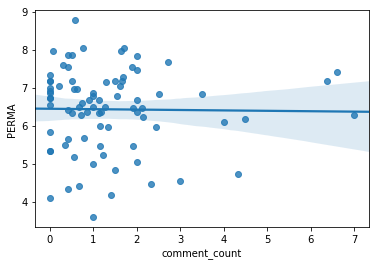

In [37]:
sns.regplot('comment_count','PERMA',data=avg_metrics)

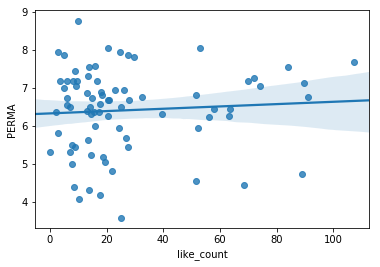

In [38]:
sns.regplot('like_count','PERMA',data=avg_metrics[avg_metrics.like_count<120])

In [39]:
from dateutil.relativedelta import relativedelta
import datetime
print image_metrics_df['start_q'].max()
print image_metrics_df['start_q'].min()
print image_metrics_df['end_q'].max()
print image_metrics_df['end_q'].min()


def Get_Linear_Weight(peak_date,given_date, days_drop_interval = 90):
    '''
    Constructs a triangle which has a peak value of 1 in the peak_date 
    and then linearly descends until it reaches 0 in days_interval days
    
    type(peak_date) = datetime.datetime
    type(given_date) = datetime.datetime
    days_drop_interval = int
    
    Usage:
    
    peak_date=datetime.datetime(2017,10,20)
    given_date=datetime.datetime(2018,1,21)
    Get_Linear_Weight(peak_date,given_date,days_drop_interval=200)
    > 0.9535
    
    Get_Linear_Weight(peak_date,given_date,days_drop_interval=30)
    > 0
    '''
    #peak_date=datetime.datetime(peak_date)
    #given_date=datetime.datetime(given_date)
    diff = peak_date-given_date
    if abs(diff)>datetime.timedelta(days_drop_interval):
        return 0
    return 1-(abs(diff.days)/float(days_drop_interval))

2017-03-22 04:04:02
2016-12-05 14:01:26
2017-03-22 04:07:08
2016-12-05 14:02:52


In [40]:
Get_Linear_Weight(image_metrics_df.image_posted_time[1], image_metrics_df.end_q[1])

0.6

In [41]:
image_metrics_df.end_q[1]-image_metrics_df.image_posted_time[1]

Timedelta('35 days 12:08:50')

In [42]:
image_metrics_df.image_posted_time[1]

Timestamp('2016-10-31 01:57:48')

In [43]:
image_metrics_df.end_q[1]

Timestamp('2016-12-05 14:06:38')

In [44]:
image_metrics_df.head()

,user_followed_by,PERMA,comment_count,like_count,user_id,image_filter,start_q,end_q,image_posted_time
1373407612938533591_53918317,100.0,5.000000,0.0,4.0,53918317.0,Moon,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 19:42:47
1372871586851626025_53918317,100.0,5.000000,0.0,4.0,53918317.0,Mayfair,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 01:57:48
1373589994983539906_53918317,100.0,5.000000,3.0,15.0,53918317.0,Lark,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-11-01 01:45:09
1493013377612710198_11520833,201.0,6.681818,2.0,21.0,11520833.0,Sierra,2016-12-05 14:08:47,2016-12-05 14:10:57,2017-04-14 20:18:05
1535098790149923516_287562303,456.0,7.136364,1.0,120.0,287562303.0,Rise,2016-12-05 14:30:51,2016-12-05 14:32:07,2017-06-11 21:54:17


In [45]:
avg_metrics  = image_metrics_df.groupby(['user_id','end_q']).mean()
#avg_metrics = pd.DataFrame({image_metrics_df.groupby('user_id').mean()}).reset.index()
avg_metrics.shape

(83, 4)

In [46]:
avg_metrics.head()

,,user_followed_by,PERMA,comment_count,like_count
user_id,end_q,,,,
1619510.0,2016-12-05 15:07:11,364.0,4.181818,1.4,17.800000
2829661.0,2016-12-05 17:27:11,198.0,7.454545,2.0,9.000000
3988856.0,2016-12-05 14:05:37,732.0,7.818182,2.0,29.500000
6734387.0,2016-12-05 15:00:59,1047.0,6.181818,4.5,220.375000
7410944.0,2016-12-05 18:58:23,146.0,7.590909,0.3,15.833333


In [47]:
image_metrics_df.head()

,user_followed_by,PERMA,comment_count,like_count,user_id,image_filter,start_q,end_q,image_posted_time
1373407612938533591_53918317,100.0,5.000000,0.0,4.0,53918317.0,Moon,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 19:42:47
1372871586851626025_53918317,100.0,5.000000,0.0,4.0,53918317.0,Mayfair,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 01:57:48
1373589994983539906_53918317,100.0,5.000000,3.0,15.0,53918317.0,Lark,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-11-01 01:45:09
1493013377612710198_11520833,201.0,6.681818,2.0,21.0,11520833.0,Sierra,2016-12-05 14:08:47,2016-12-05 14:10:57,2017-04-14 20:18:05
1535098790149923516_287562303,456.0,7.136364,1.0,120.0,287562303.0,Rise,2016-12-05 14:30:51,2016-12-05 14:32:07,2017-06-11 21:54:17


In [48]:
type(image_metrics_df.image_posted_time[0])

pandas._libs.tslib.Timestamp

In [49]:
image_metrics_df['image_weight'] = \
map(lambda img_date, survey_date: Get_Linear_Weight(given_date=img_date, peak_date=survey_date) \
                                       , image_metrics_df.image_posted_time, image_metrics_df.end_q)

In [50]:
image_metrics_df.head()

,user_followed_by,PERMA,comment_count,like_count,user_id,image_filter,start_q,end_q,image_posted_time,image_weight
1373407612938533591_53918317,100.0,5.000000,0.0,4.0,53918317.0,Moon,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 19:42:47,0.622222
1372871586851626025_53918317,100.0,5.000000,0.0,4.0,53918317.0,Mayfair,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 01:57:48,0.611111
1373589994983539906_53918317,100.0,5.000000,3.0,15.0,53918317.0,Lark,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-11-01 01:45:09,0.622222
1493013377612710198_11520833,201.0,6.681818,2.0,21.0,11520833.0,Sierra,2016-12-05 14:08:47,2016-12-05 14:10:57,2017-04-14 20:18:05,0.000000
1535098790149923516_287562303,456.0,7.136364,1.0,120.0,287562303.0,Rise,2016-12-05 14:30:51,2016-12-05 14:32:07,2017-06-11 21:54:17,0.000000


# Weight the catogories

In [51]:
# image_metrics_df['user_followed_by'] = image_metrics_df['user_followed_by']*image_metrics_df['image_weight']
# image_metrics_df['comment_count'] = image_metrics_df['comment_count']*image_metrics_df['image_weight']
# image_metrics_df['like_count'] = image_metrics_df['like_count']*image_metrics_df['image_weight']

In [52]:
image_metrics_df.head()

,user_followed_by,PERMA,comment_count,like_count,user_id,image_filter,start_q,end_q,image_posted_time,image_weight
1373407612938533591_53918317,100.0,5.000000,0.0,4.0,53918317.0,Moon,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 19:42:47,0.622222
1372871586851626025_53918317,100.0,5.000000,0.0,4.0,53918317.0,Mayfair,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-10-31 01:57:48,0.611111
1373589994983539906_53918317,100.0,5.000000,3.0,15.0,53918317.0,Lark,2016-12-05 14:05:13,2016-12-05 14:06:38,2016-11-01 01:45:09,0.622222
1493013377612710198_11520833,201.0,6.681818,2.0,21.0,11520833.0,Sierra,2016-12-05 14:08:47,2016-12-05 14:10:57,2017-04-14 20:18:05,0.000000
1535098790149923516_287562303,456.0,7.136364,1.0,120.0,287562303.0,Rise,2016-12-05 14:30:51,2016-12-05 14:32:07,2017-06-11 21:54:17,0.000000


In [53]:
#GROUPBY users

avg_weighted_metrics  = image_metrics_df.groupby('user_id').mean()

print avg_weighted_metrics.shape
avg_weighted_metrics.head()

(82, 5)


,user_followed_by,PERMA,comment_count,like_count,image_weight
user_id,,,,,
1619510.0,364.0,4.181818,1.4,17.800000,0.463333
2829661.0,198.0,7.454545,2.0,9.000000,0.000000
3988856.0,732.0,7.818182,2.0,29.500000,0.105556
6734387.0,1047.0,6.181818,4.5,220.375000,0.454167
7410944.0,146.0,7.590909,0.3,15.833333,0.241111


In [54]:
# import pickle
# with open ('avg_weighted_metrics.pickle','wb') as f:
#     pickle.dump(avg_weighted_metrics,f)

# LOAD Pickle

In [55]:
# import pickle

# with open ('avg_weighted_metrics.pickle', 'rb') as f:
#     avg_weighted_metrics = pickle.load(f)

In [56]:
avg_weighted_metrics.head()

,user_followed_by,PERMA,comment_count,like_count,image_weight
user_id,,,,,
1619510.0,364.0,4.181818,1.4,17.800000,0.463333
2829661.0,198.0,7.454545,2.0,9.000000,0.000000
3988856.0,732.0,7.818182,2.0,29.500000,0.105556
6734387.0,1047.0,6.181818,4.5,220.375000,0.454167
7410944.0,146.0,7.590909,0.3,15.833333,0.241111


In [57]:
def subtrack_features(main_list, subtr_features):
    
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [58]:
#Add the features of the metrics to the main features list
features = ['user_followed_by','comment_count','like_count']
print features

lm1_model = regression_stats(prepare_set_statmodel(features),image_metrics_df)
lm1_model.summary() 

['user_followed_by', 'comment_count', 'like_count']
Intercept           6.595524
user_followed_by   -0.000373
comment_count      -0.047641
like_count          0.005751
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     14.17
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           4.65e-09
Time:                        18:59:01   Log-Likelihood:                -1466.8
No. Observations:                1054   AIC:                             2942.
Df Residuals:                    1050   BIC:                             2961.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5955      0.044    148.999      0.000       6.509       6.682
user_followed_by    -0.0004   6.73e-05     -5.538      0.000      -0.001      -0.000
comment_count       -0.0476      0.017     -2.742      0.006      -0.082      -0.014
like_count           0.0058      0.001      5.485      0.000       0.004       0.008
==============================================================================
Omnibus:                       13.997   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.391
Skew:                          -0.280   Prob(JB):                     0.000750
Kurtosis:                       2.881   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

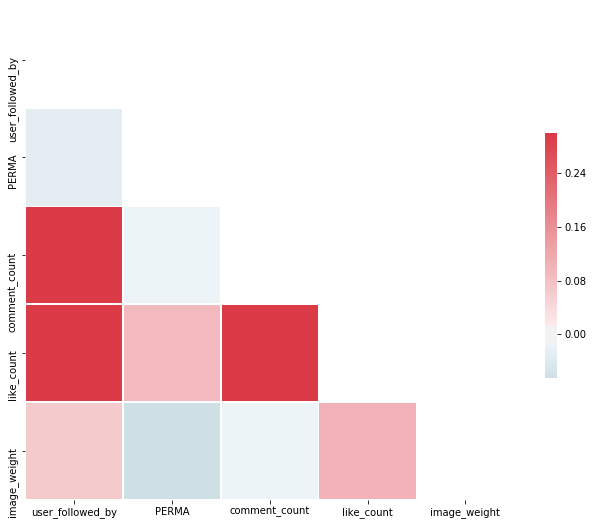

In [59]:
#correlation matrix
correlation_matrix = avg_weighted_metrics.corr()

#PLOT THE CORRELATIONS TO Seaborn

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure|
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

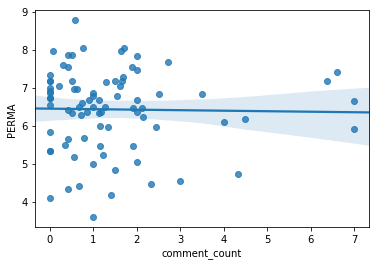

In [60]:
#features = ['user_followed_by','comment_count','like_count']
sns.regplot('comment_count','PERMA',data=avg_metrics)

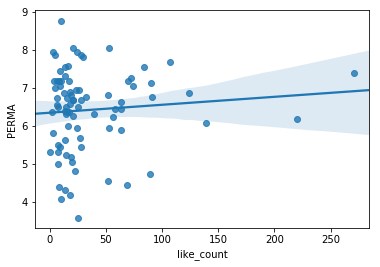

In [ ]:
sns.regplot('like_count','PERMA',data=avg_metrics)